# PROJET ANALYSE DE DONNEES
#### Etude des stations de location de vélos dans Paris

In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline

Les données suivantes représentent le taux de disponibilité des vélos dans toutes les stations de Paris. Nous avons accès à la valeur de ce taux pour chacune des 24 heures de chaque jour de la semaine sur la période du 2 septembre au 7 septembre 2014.

Plus le taux est proche de 1 plus la station a de vélos disponibles. Inversement, quand ce taux est proche de 0 alors il y a de moins en moins de vélos libres dans la station.

## Présentation des données

Nous allons ici importer toutes les données mises à notre disposition.

In [2]:
loading = pd.read_csv('data/velibLoading.csv', sep = " ")
loading.head()

,Lun-00,Lun-01,Lun-02,Lun-03,Lun-04,Lun-05,Lun-06,Lun-07,Lun-08,Lun-09,...,Dim-14,Dim-15,Dim-16,Dim-17,Dim-18,Dim-19,Dim-20,Dim-21,Dim-22,Dim-23
1,0.038462,0.038462,0.076923,0.038462,0.038462,0.038462,0.038462,0.038462,0.107143,0.000000,...,0.296296,0.111111,0.111111,0.148148,0.307692,0.076923,0.115385,0.076923,0.153846,0.153846
2,0.478261,0.478261,0.478261,0.434783,0.434783,0.434783,0.434783,0.434783,0.260870,0.043478,...,0.043478,0.000000,0.217391,0.130435,0.045455,0.173913,0.173913,0.173913,0.260870,0.391304
3,0.218182,0.145455,0.127273,0.109091,0.109091,0.109091,0.090909,0.090909,0.054545,0.109091,...,0.259259,0.259259,0.203704,0.129630,0.148148,0.296296,0.314815,0.370370,0.370370,0.407407
4,0.952381,0.952381,0.952381,0.952381,0.952381,0.952381,0.952381,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.904762,0.857143,0.857143,0.857143,0.761905,0.761905,0.761905,0.761905
5,0.927536,0.811594,0.739130,0.724638,0.724638,0.724638,0.724638,0.724638,0.753623,0.971014,...,0.227273,0.454545,0.590909,0.833333,1.000000,0.818182,0.636364,0.712121,0.621212,0.575758


Les 168 colonnes représentent le total des heures dans une semaine. Les 1189 lignes correspondent aux données de toutes les stations de Paris que nous étudions ici.

On affiche les statistiques des taux de chaque heure d'une journée 

In [3]:
loading.describe()

,Lun-00,Lun-01,Lun-02,Lun-03,Lun-04,Lun-05,Lun-06,Lun-07,Lun-08,Lun-09,...,Dim-14,Dim-15,Dim-16,Dim-17,Dim-18,Dim-19,Dim-20,Dim-21,Dim-22,Dim-23
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,...,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,0.401503,0.408770,0.411718,0.415161,0.417136,0.421650,0.419860,0.415729,0.384658,0.326331,...,0.346147,0.325526,0.311334,0.306399,0.314730,0.334080,0.353493,0.385975,0.392552,0.397529
std,0.337079,0.335566,0.336132,0.337158,0.332237,0.326644,0.323422,0.319302,0.303621,0.314026,...,0.340516,0.339897,0.336863,0.331194,0.322904,0.317279,0.317572,0.328448,0.335061,0.341536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.093750,0.093023,0.096774,0.100000,0.108696,0.114286,0.114286,0.117647,0.114286,0.047619,...,0.051282,0.041667,0.038462,0.043478,0.052632,0.071429,0.080000,0.095238,0.086957,0.090909
50%,0.312500,0.333333,0.342857,0.350000,0.357143,0.363636,0.360000,0.360000,0.320000,0.215385,...,0.204082,0.166667,0.151515,0.142857,0.172414,0.200000,0.238095,0.285714,0.292683,0.292683
75%,0.694444,0.705882,0.708333,0.710526,0.700000,0.700000,0.700000,0.687500,0.636364,0.575000,...,0.651163,0.608696,0.555556,0.550000,0.550000,0.558140,0.600000,0.666667,0.666667,0.692308
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Les 168 colonnes represéntent comme précedemment chaque heure d'une semaine. Les lignes correspondent à differentes données calculées sur toutes les stations chaque heure.

Nous allons maintenant importer les coordonnées géographiques de chaque stations. 

In [4]:
coord = pd.read_csv('./data/velibCoord.csv', sep = " ")

coord.head()

,longitude,latitude,bonus,names
1,2.377389,48.886300,0,EURYALE DEHAYNIN
2,2.317591,48.890020,0,LEMERCIER
3,2.330447,48.850297,0,MEZIERES RENNES
4,2.271396,48.833734,0,FARMAN
5,2.366897,48.845887,0,QUAI DE LA RAPEE


Grace à la commande ".head", nous avons affiché seulement les 5 premières lignes du tableau "coord".

## Analyse descriptive des données

Nous regardons dans cette cellule si certaines données sont manquantes, si certaines cases sont vides. 

In [5]:
print("Nombre de données manquantes dans 'loading':")
print(loading.isna().sum().sum())
print("Nombre de données manquantes dans 'coord':")
print(coord.isna().sum().sum())

Nombre de données manquantes dans 'loading':
0
Nombre de données manquantes dans 'coord':
0


Or ici, le résultat obtenu pour chaque tableau "loading" et "coord" est 0, il n'y a donc pas de donnée manquante ! 

In [6]:
loading_missing_value = loading.isna().sum().sort_values(ascending=False)

print("--- Somme des valeurs manquantes dans 'Loading' ---")
print(loading_missing_value.sum())

# --- #
print('')

coord_missing_value = coord.isna().sum().sort_values(ascending=False)

print("--- Somme des valeurs manquantes dans 'Coord' ---")
print(coord_missing_value)

--- Somme des valeurs manquantes dans 'Loading' ---
0

--- Somme des valeurs manquantes dans 'Coord' ---
longitude    0
latitude     0
bonus        0
names        0
dtype: int64


Nous affichons ici le nombre d'occurences de chaque station dans nos données.

In [7]:
station_name = coord.names.value_counts()
print(station_name)


 PORTE DES LILAS                 3
 GARE D'AUSTERLITZ               3
 PORTE DE BAGNOLET               2
 CHERCHE MIDI                    2
 LEGENDRE                        2
                                ..
 BEL AIR                         1
 ASSAS LUXEMBOURG                1
 COURS DE VINCENNES BD DAVOUT    1
 RUISSEAU ORDENER                1
 QUAI VOLTAIRE                   1
Name: names, Length: 1161, dtype: int64


On peut voir dans le tableau suivant que le nom de station qui apparait 3 fois correspond à des stations dont les coordonnées géographiques sont différentes.

 Le tableau suivant nous informe que la station "porte des lilas" et "gare d'Austerlitz" apparaissent trois fois

In [8]:
name = station_name.index[0]
coord[coord.names == name]

,longitude,latitude,bonus,names
362,2.404770,48.876604,1,PORTE DES LILAS
450,2.405960,48.875412,1,PORTE DES LILAS
957,2.411046,48.878099,1,PORTE DES LILAS


Nous nous intéressons maintenant aux différentes moyennes des stations, que nous remarquons non homogène, et qu'il est donc, intéressant de regarder d'un peu plus près les différentes moyennes observées pour avoir une vision globale de l'impact des heures, jours et de la localisation des stations sur le comportement d'utilisation.

En effet, dans le graphe suivant, il est possible de voir que le taux de chargement moyen varie énormément.

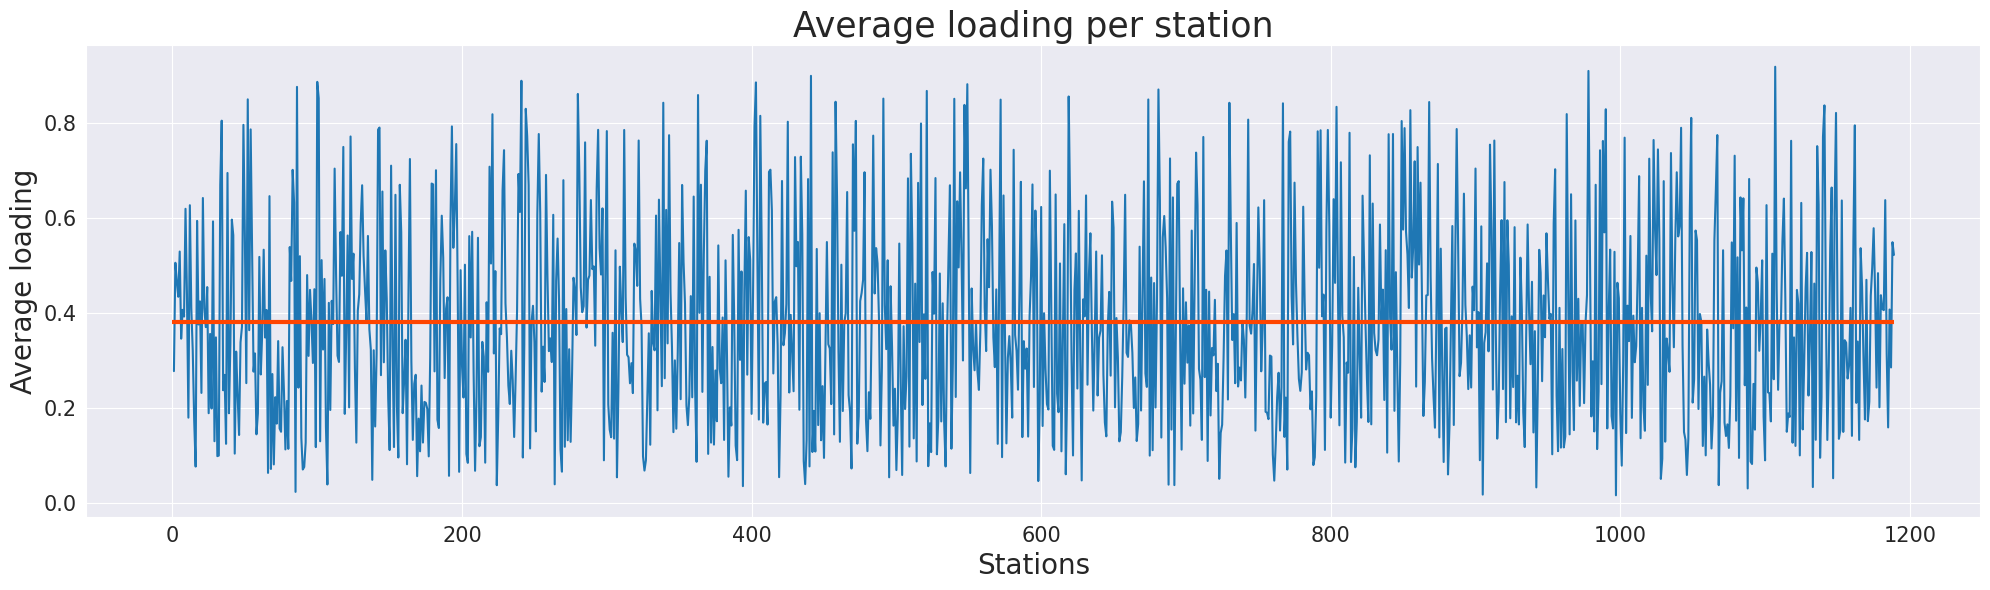

In [9]:
loading_mean = pd.Series(loading.mean(axis=1))
# %load solutions/Python/plot_mean_stations.py
n_stations = loading.shape[0]  # number of observed stations
stations   = np.arange(n_stations)

plt.figure(figsize = (20,6))

# --- #

plt.plot(loading_mean)
plt.hlines(y = loading.mean().mean(), xmin=0, xmax=n_stations, 
           colors = "OrangeRed", linewidth = 3)

# --- #

plt.xlabel('Stations', fontsize = 20)
plt.ylabel('Average loading', fontsize = 20)
plt.title("Average loading per station", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.tight_layout()
plt.show()

Les moyennes : 
    - Moyenne par heure par jour 
    - Station la + utilisée par jour
    - Station la - utilisée par jour 
    - Station la + utilisée par semaine 
    - Station la - utilisée par semaine 
    - heure la plus creuse d'utilisation (ie le taux est proche de 1 car tous les vélos sont à la station)
    - heure la + fréquentée (ie le taux est proche de 0)
    - jour le + fréquenté

- Moyenne par heure par jour 

- Taux d'utilisation en moyenne sur l'ensemble des heures, jours et stations, nous donne une idée globale sur l'utilisation parisienne des vélib

On affiche dans le cadre suivant la moyenne du taux de chargement sur toutes les stations au cours de la semaine.

In [10]:
print(loading.mean().mean())

0.3816217759807477


On cherche maitenant à déterminer la **station la plus fréquentée**, en moyenne par semaine, c'est-à-dire le taux moyen le plus bas en regardant l'ensemble des jours.

In [11]:
mean=loading.mean(axis=1)
i = mean.idxmin()
print('Moyenne de la station la plus fréquentée :',mean[i])
print(coord.loc[i])

Moyenne de la station la plus fréquentée : 0.016132842025699153
longitude              2.427934
latitude              48.873929
bonus                         1
names         HORNET (BAGNOLET)
Name: 997, dtype: object


De la même façon , on cherche à déterminer maintenant la **station la moins fréquentée**, en moyenne par semaine.

In [12]:
mean=loading.mean(axis=1)
i = mean.idxmax()
print('Moyenne de la station la moins fréquentée :',mean[i])
print(coord.loc[i])

Moyenne de la station la moins fréquentée : 0.9193722943722953
longitude                          2.398262
latitude                           48.81466
bonus                                     0
names         INSURRECTION AOUT 1944 (IVRY)
Name: 1107, dtype: object


Le graphe suivant illustre le taux de chargement moyen dans tout Paris, sur la journée et pour chaque jour de la semaine.

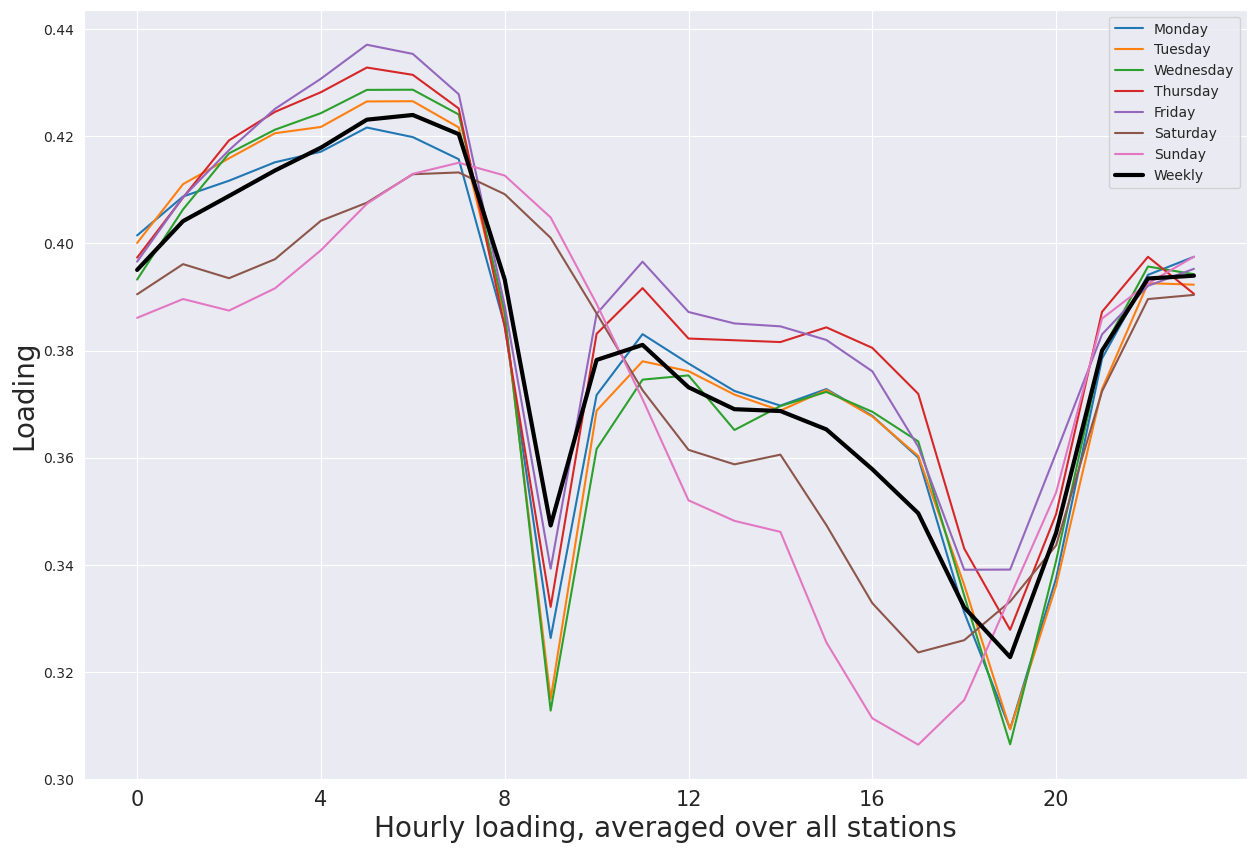

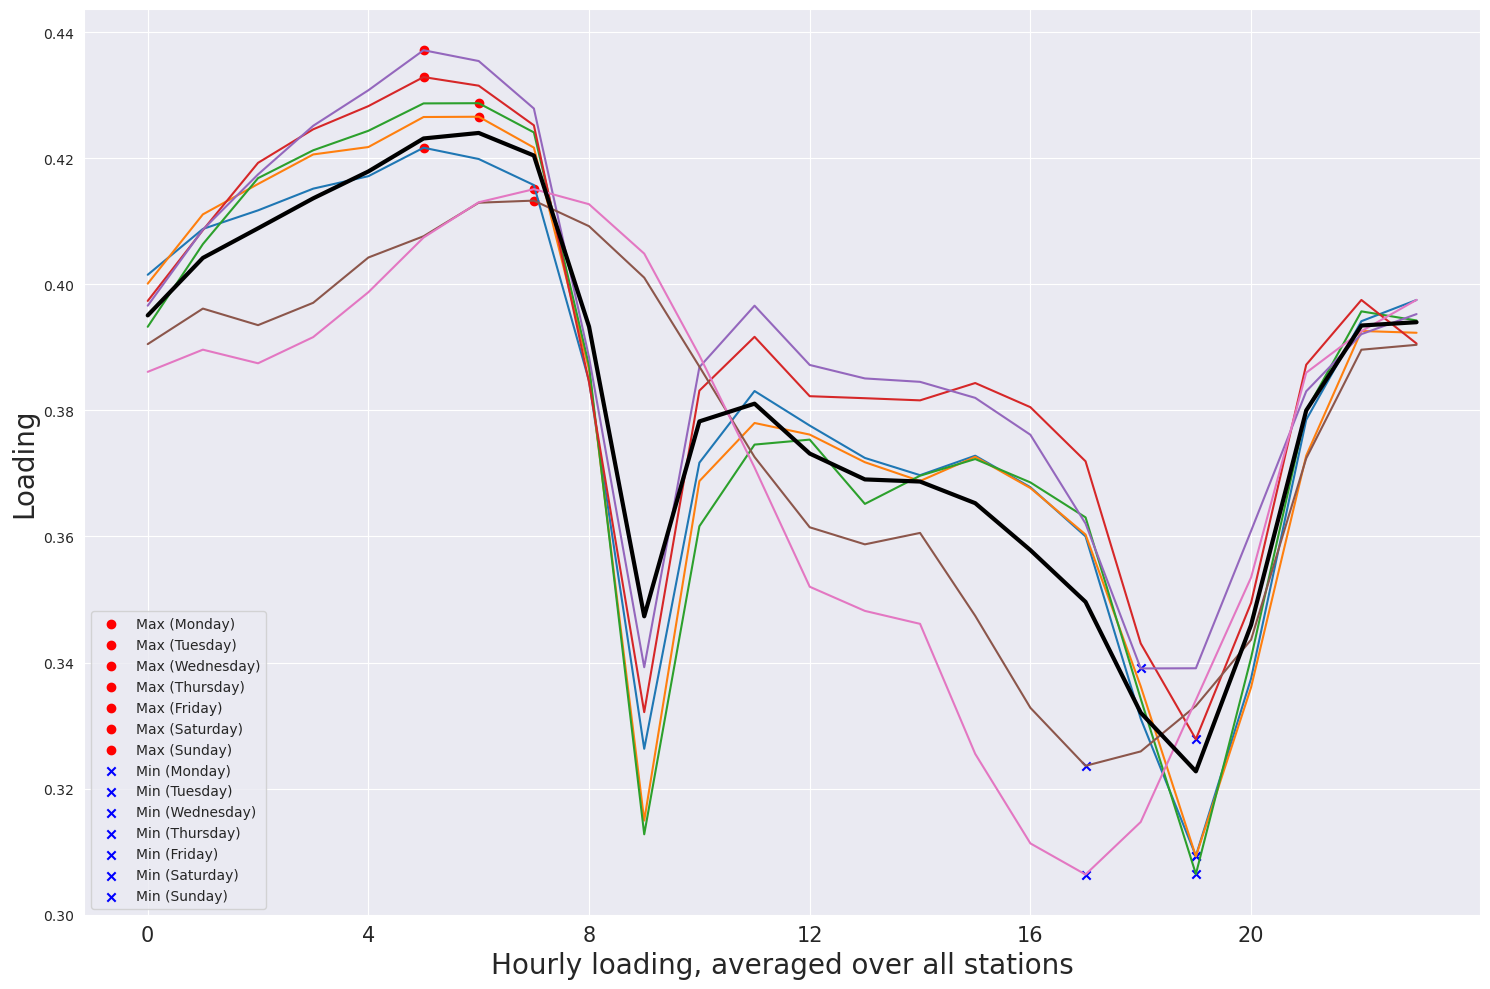

In [13]:
mean_per_hour_per_day = loading.mean(axis = 0).to_numpy()
mean_per_hour_per_day = mean_per_hour_per_day.reshape((7, 24))

mean_per_hour = mean_per_hour_per_day.mean(axis=0)

# --- #

days = ["Monday", "Tuesday", "Wednesday","Thursday", "Friday", "Saturday", "Sunday"]
plt.figure(figsize = (15,10))

plt.plot(mean_per_hour_per_day.transpose())
plt.plot(mean_per_hour, color = "black", linewidth = 3)

plt.xlabel('Hourly loading, averaged over all stations', fontsize = 20)
plt.ylabel('Loading', fontsize = 20)
plt.legend(days + ['Weekly'])
plt.xticks(ticks = np.arange(0,24,4), labels=np.arange(0,24,4), fontsize = 15)
  
plt.tight_layout
plt.show()

# Trouver les indices des points maximaux
max_indices = np.argmax(mean_per_hour_per_day, axis=1)

# Trouver les indices des points minimaux
min_indices = np.argmin(mean_per_hour_per_day, axis=1)

plt.figure(figsize=(15, 10))

# Tracer les lignes des moyennes de chargement par heure pour chaque jour de la semaine
plt.plot(mean_per_hour_per_day.transpose())

# Tracer une ligne pour la moyenne hebdomadaire
plt.plot(mean_per_hour, color="black", linewidth=3)

# Ajouter des marqueurs pour les points maximaux
for i, day in enumerate(days):
    plt.scatter(max_indices[i], mean_per_hour_per_day[i, max_indices[i]], marker='o', color='red', label=f'Max ({day})')

# Ajouter des marqueurs pour les points minimaux
for i, day in enumerate(days):
    plt.scatter(min_indices[i], mean_per_hour_per_day[i, min_indices[i]], marker='x', color='blue', label=f'Min ({day})')

plt.xlabel('Hourly loading, averaged over all stations', fontsize=20)
plt.ylabel('Loading', fontsize=20)
plt.legend()
plt.xticks(ticks=np.arange(0, 24, 4), labels=np.arange(0, 24, 4), fontsize=15)
plt.tight_layout()
plt.show()


Cela nous permet de connaître les heures d'influence globale de l'utilisation des vélos, de plus le deuxième de graphe nous indique les points de moyenne minimaux et maximaux. 
Ainsi en moyenne, **les stations sont plus sollicitées autour de 17h le week-end et 18-19h en semaine. Et moins socillicitées autour de 7h en week-end et 5-6h la semaine**. Cela ne reste qu'une moyenne, mais ce résultat s'explique par les heures de travail de la population qui part le matin en vélo et rentre en fin de journée. 

On s'intéresse maintenant au jour de la semaine ou les vélos sont le plus utilisés. On calcule donc la moyenne des taux par jour et on regarde la plus basse.

In [14]:
# Supposez que mean_per_hour_per_day a déjà été calculé

# Calculer les moyennes de chargement par jour
mean_per_day = mean_per_hour_per_day.mean(axis=1)

# Trouver l'indice du jour avec la moyenne la plus basse
jour_plus_bas = np.argmin(mean_per_day)

# Liste des jours de la semaine
jours_semaine = ["Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi", "Dimanche"]

# Afficher le jour avec la moyenne la plus basse
print("Le jour de la semaine où les gens utilisent le plus les vélos en moyenne est le :", jours_semaine[jour_plus_bas])


Le jour de la semaine où les gens utilisent le plus les vélos en moyenne est le : Dimanche


Partie de Paul version Python : 

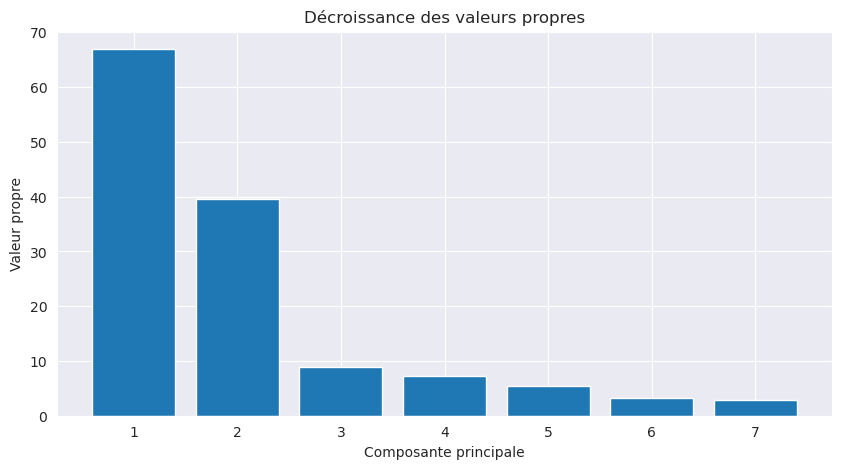

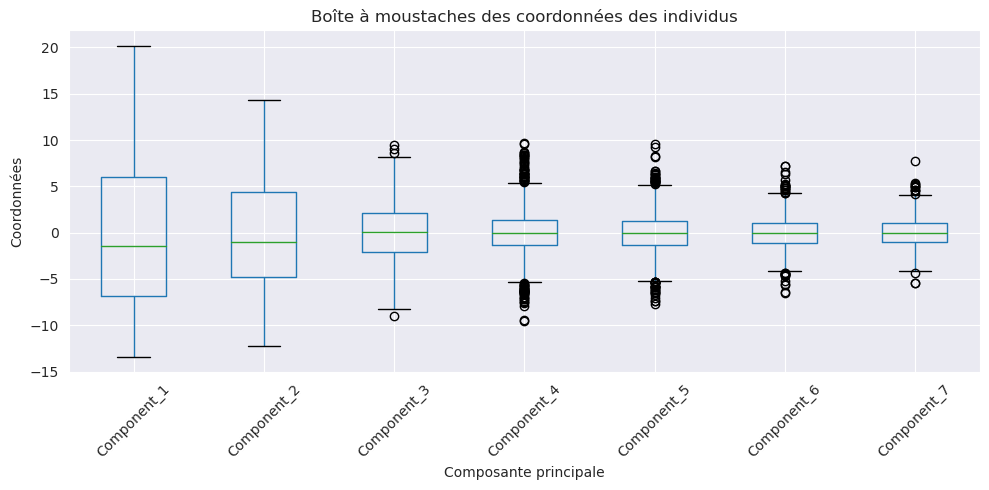

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Supposons que loading soit votre DataFrame contenant les données

# Standardisation des données
scaler = StandardScaler()
loading_scaled = scaler.fit_transform(loading)

# Analyse en Composantes Principales (ACP)
pca = PCA(n_components=7)
acp = pca.fit_transform(loading_scaled)

# Valeurs propres
eigenvalues = pca.explained_variance_

# Décroissance des valeurs propres
plt.figure(figsize=(10, 5))
plt.bar(np.arange(1, len(eigenvalues) + 1), eigenvalues)
plt.xlabel('Composante principale')
plt.ylabel('Valeur propre')
plt.title('Décroissance des valeurs propres')
plt.show()

# Boîte à moustaches des coordonnées des individus sur les composantes principales
ind_coord_df = pd.DataFrame(acp, columns=[f'Component_{i+1}' for i in range(acp.shape[1])])

plt.figure(figsize=(10, 5))
ind_coord_df.boxplot()
plt.xlabel('Composante principale')
plt.ylabel('Coordonnées')
plt.title('Boîte à moustaches des coordonnées des individus')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## ACP by nous 

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

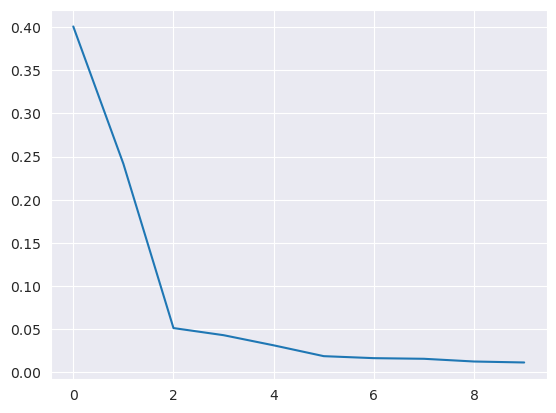

In [17]:
pca = PCA()
## Estimation, calcul des composantes principales
C = pca.fit(loading).transform(loading)
## Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_[0:10])
plt.show()

In [18]:
sum=0
d=0
while sum<0.85:
    d=d+1
    pca=PCA(n_components=d)
    X=pca.fit_transform(loading)
    sum=np.sum(pca.explained_variance_ratio_)
print(sum)
print(d)

0.8531865865798917
11


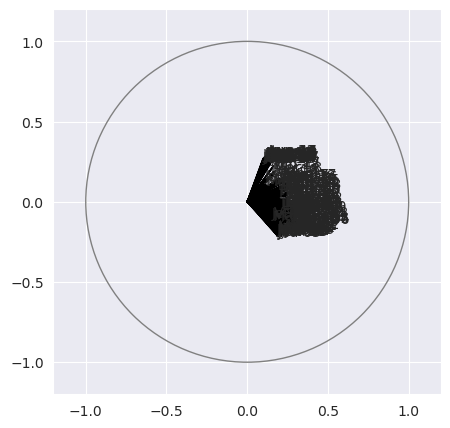

In [19]:
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, loading.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

In [20]:
import matplotlib.pyplot as plt

# Supposons que vous ayez déjà effectué PCA sur vos données et obtenu un objet PCA nommé pca
# X est votre jeu de données

# Entraînement de PCA sur les données
pca.fit(loading)

# Obtention des vecteurs propres (composantes principales)
eigenvectors = pca.components_

# Création d'un graphique biplot
plt.figure(figsize=(8, 8))
plt.scatter(pca[:, 0], X_pca[:, 1], alpha=0.6)  # Représentation des observations dans l'espace PCA

# Représentation des vecteurs propres
for i, (x, y) in enumerate(zip(eigenvectors[0, :], eigenvectors[1, :])):
    plt.arrow(0, 0, x, y, color='r', alpha=0.5)  # Trace les vecteurs propres
    plt.text(x, y, f'Variable {i+1}', fontsize=12, ha='right', va='bottom', color='r')  # Ajoute le nom de la variable à chaque vecteur propre

plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('Biplot avec vecteurs propres')
plt.grid(True)
plt.show()

TypeError: 'PCA' object is not subscriptable

<Figure size 800x800 with 0 Axes>

In [ ]:
pca = PCA(n_components=11)
X=pca.fit_transform(loading)
eigenvectors = pca.components_
print(eigenvectors)
plt.plot(eigenvectors[0,:])
plt.plot(eigenvectors[1,:])
plt.plot(eigenvectors[2,:])
plt.xlabel('Time', fontsize = 15)
plt.ylabel('??', fontsize = 15)
plt.title("1ere composante", fontsize = 15)
time_tick  = np.linspace(1, 168, 8)
plt.vlines(x = time_tick, ymin = 0, ymax = 0.15, 
           colors = "Orange", linestyle = "dotted", linewidth = 5)

#A GARDER cf feuille de notes

In [ ]:
plt.plot(X[0,:])
plt.plot(X[1,:])
plt.plot(X[2,:])
plt.plot(X[100,:])
#projection du premier individu sur les différents vp, conclusion = trop dur à analyser

In [ ]:
pca = PCA(n_components=11)
X=pca.fit_transform(loading)
eigenvectors = pca.components_
print(eigenvectors)
plt.plot(eigenvectors[1,:])
plt.xlabel('Time', fontsize = 15)
plt.ylabel('??', fontsize = 15)
plt.title("2ème composante", fontsize = 15)
time_tick  = np.linspace(1, 168, 8)
plt.vlines(x = time_tick, ymin = -0.15, ymax = 0.15, 
           colors = "Orange", linestyle = "dotted", linewidth = 5)

In [ ]:
cols_24 = loading.columns[:24]

# Calculer la moyenne des 24 premières colonnes pour chaque individu
mean_24 = df[cols_24].mean(axis=1)

In [ ]:
b =loading.mean(axis=0).to_numpy()
c = b.reshape((7,24))
#new_df = np.mean(loading.reshape(-1,7,24),axis=0).to_numpy()
#a = loading.mean(axis=1)
#a
c

## ACP by TP methods 

In [91]:
# ACP sur toutes les données : 

In [92]:
from sklearn.decomposition import PCA

pca = PCA()
loading_pca = pca.fit_transform(loading)

on garde 11 composants pour le PCA


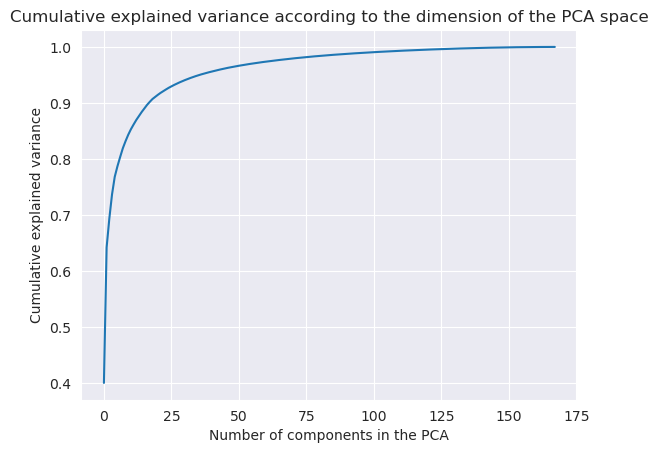

In [93]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.title('Cumulative explained variance according to the dimension of the PCA space')
plt.xlabel('Number of components in the PCA')
plt.ylabel('Cumulative explained variance');


#permet de connaître le nombre de variables à garder pour expliquer 90% de la variance 

#pca = PCA(0.90).fit(loading) 

pca = PCA(0.85).fit(loading) #pour savoir directement le nombre de composants nécessaire pour représenter une explication de 85% de la variance
pca.n_components_ #on affiche le nb de composants qu'on garde pour la PCA
print(f"on garde {pca.n_components_} composants pour le PCA")

In [94]:
#pca = PCA(n_components=18)
pca = PCA(n_components=11)

loading_pca = pca.fit_transform(loading) #même chose que fit puis transform dans notre cas à nous

print(100*pca.explained_variance_ratio_)


print('--- PCA ---')
print('Initial dimension:', loading.shape)
print('Dimension after projection:', loading_pca.shape)

print('')

print('--- Explained variance ---')
print('Component 1:', round(pca.explained_variance_[0],2), 'i.e.', round(100*pca.explained_variance_ratio_[0],2), '% of the total variance')
print('Component 2:', round(pca.explained_variance_[1],2), 'i.e.', round(100*pca.explained_variance_ratio_[1],2), '% of the total variance')
print('Component 3:', round(pca.explained_variance_[2],2), 'i.e.', round(100*pca.explained_variance_ratio_[2],2), '% of the total variance')


[40.07166651 24.16919541  5.13413329  4.30937348  3.13423758  1.87940337
  1.6488254   1.57513215  1.26011258  1.14789135  0.98868751]
--- PCA ---
Initial dimension: (1189, 168)
Dimension after projection: (1189, 11)

--- Explained variance ---
Component 1: 7.98 i.e. 40.07 % of the total variance
Component 2: 4.81 i.e. 24.17 % of the total variance
Component 3: 1.02 i.e. 5.13 % of the total variance


On affiche l'histogramme de ce que chaque variable explique dans le modèle

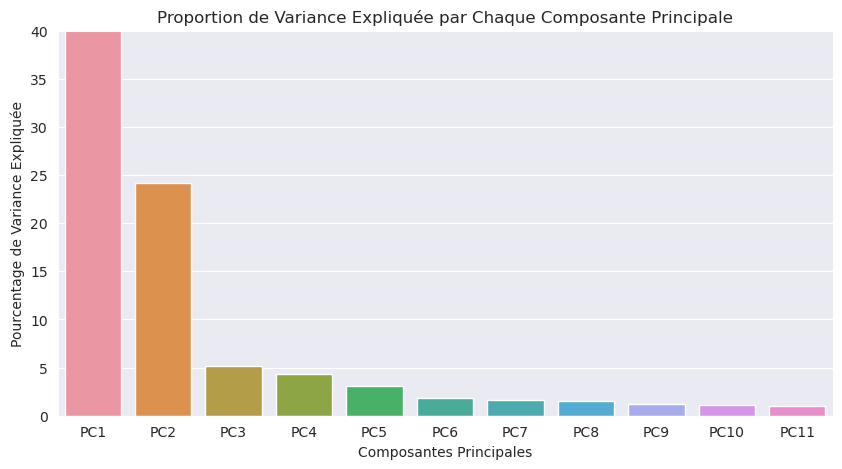

In [95]:
plt.figure(figsize=(10, 5))
sns.barplot(x=[f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))], y=pca.explained_variance_ratio_ * 100)
plt.xlabel("Composantes Principales")
plt.ylabel("Pourcentage de Variance Expliquée")
plt.title("Proportion de Variance Expliquée par Chaque Composante Principale")
plt.ylim(0, 40)  # limiter l'axe y à la plage spécifiée
plt.show()

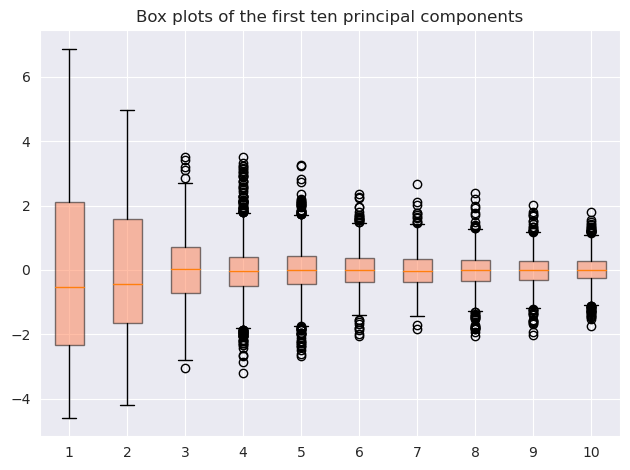

In [96]:
box = plt.boxplot(loading_pca[:,:10], patch_artist=True)
plt.setp(box["boxes"], facecolor="coral", alpha=.5)
plt.title("Box plots of the first ten principal components")
plt.tight_layout()
plt.show()

Représentation de la PCA : projection des données sur les axes des deux composantes principales :

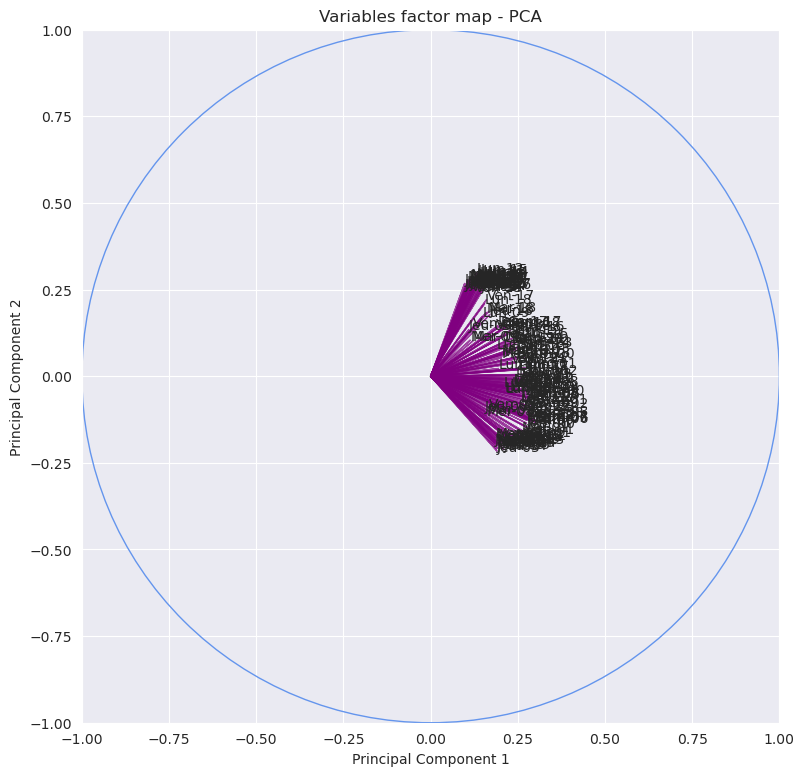

In [97]:
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1, coord2, loading.columns):
    plt.text(i, j, nom, fontsize=10)
    plt.arrow(0, 0, i, j, color = 'purple', alpha=0.7, width = 0.0001)

plt.axis((-1, 1, -1, 1))
plt.gcf().gca().add_artist(plt.Circle((0, 0), radius = 1, color = 'cornflowerblue', fill = False))

plt.title('Variables factor map - PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.grid(True)
plt.show()

In [98]:
# ACP par jour

On regroupe les données par jour de la semaine afin de faire une ACP sur ces données déjà regrouper par jour. Donc on calcul la moyenne du taux pour le jour 1 ie lundi, de m^me pour tous les autres jours.

In [126]:
# Calcul des moyennes pour chaque jour de la semaine
lundi = loading.iloc[:, list(range(0, 24))].mean(axis=1)
mardi = loading.iloc[:, list(range(24, 48))].mean(axis=1)
mercredi = loading.iloc[:, list(range(48, 72))].mean(axis=1)
jeudi = loading.iloc[:, list(range(72, 96))].mean(axis=1)
vendredi = loading.iloc[:, list(range(96, 120))].mean(axis=1)
samedi = loading.iloc[:, list(range(120, 144))].mean(axis=1)
dimanche = loading.iloc[:, list(range(144, 168))].mean(axis=1)

# Création du nouveau DataFrame
data_jours = pd.DataFrame({
    'lundi': lundi,
    'mardi': mardi,
    'mercredi': mercredi,
    'jeudi': jeudi,
    'vendredi': vendredi,
    'samedi': samedi,
    'dimanche': dimanche
})

print(data_jours)

         lundi     mardi  mercredi     jeudi  vendredi    samedi  dimanche
1     0.111149  0.296462  0.378527  0.361387  0.418596  0.244819  0.134081
2     0.342391  0.579710  0.510870  0.572464  0.528986  0.605072  0.404068
3     0.273874  0.626680  0.389394  0.456818  0.571731  0.532141  0.416667
4     0.759921  0.367063  0.309193  0.330260  0.311508  0.311508  0.652778
5     0.736609  0.608376  0.550716  0.450216  0.598082  0.356832  0.408460
...        ...       ...       ...       ...       ...       ...       ...
1185  0.027668  0.168478  0.226449  0.307724  0.077899  0.155797  0.150362
1186  0.252778  0.345370  0.499074  0.606481  0.325000  0.405556  0.419444
1187  0.273420  0.206944  0.336111  0.280556  0.213889  0.173755  0.514368
1188  0.666667  0.809524  0.429762  0.091667  0.245000  0.750000  0.854363
1189  0.790911  0.489645  0.471711  0.440104  0.328027  0.460265  0.679703

[1189 rows x 7 columns]


In [106]:
pca_2 = PCA()
data_jours_pca = pca_2.fit_transform(data_jours)

on garde 2 composants pour le PCA


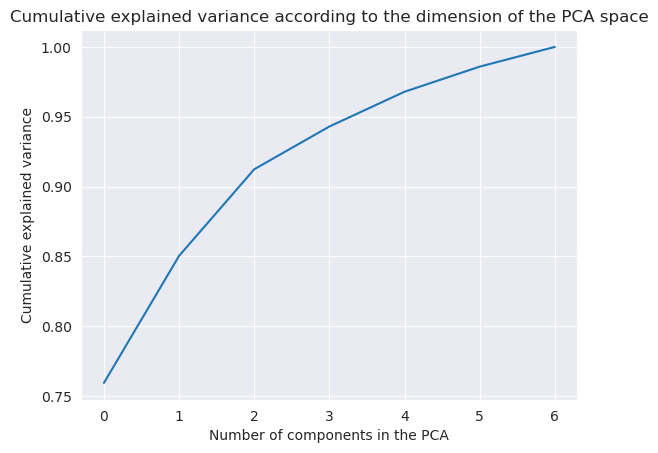

In [107]:
plt.plot(np.cumsum(pca_2.explained_variance_ratio_))

plt.title('Cumulative explained variance according to the dimension of the PCA space')
plt.xlabel('Number of components in the PCA')
plt.ylabel('Cumulative explained variance');


#permet de connaître le nombre de variables à garder pour expliquer 90% de la variance 

#pca = PCA(0.90).fit(loading) 

pca_2 = PCA(0.85).fit(data_jours) #pour savoir directement le nombre de composants nécessaire pour représenter une explication de 85% de la variance
pca_2.n_components_ #on affiche le nb de composants qu'on garde pour la PCA
print(f"on garde {pca_2.n_components_} composants pour le PCA")

In [110]:
pca_2=PCA(n_components=2)
data_jours_pca = pca_2.fit_transform(data_jours) #même chose que fit puis transform dans notre cas à nous

print(100*pca_2.explained_variance_ratio_)


print('--- PCA ---')
print('Initial dimension:', data_jours.shape)
print('Dimension after projection:', data_jours_pca.shape)

print('')

print('--- Explained variance ---')
print('Component 1:', round(pca_2.explained_variance_[0],2), 'i.e.', round(100*pca_2.explained_variance_ratio_[0],2), '% of the total variance')
print('Component 2:', round(pca_2.explained_variance_[1],2), 'i.e.', round(100*pca_2.explained_variance_ratio_[1],2), '% of the total variance')

[75.94831434  9.09414305]
--- PCA ---
Initial dimension: (1189, 7)
Dimension after projection: (1189, 2)

--- Explained variance ---
Component 1: 0.32 i.e. 75.95 % of the total variance
Component 2: 0.04 i.e. 9.09 % of the total variance


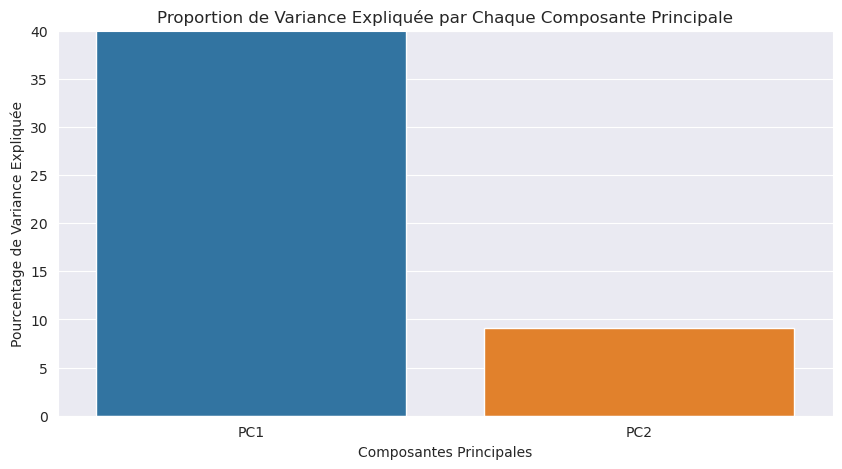

In [113]:
plt.figure(figsize=(10, 5))
sns.barplot(x=[f"PC{i+1}" for i in range(len(pca_2.explained_variance_ratio_))], y=pca_2.explained_variance_ratio_ * 100)
plt.xlabel("Composantes Principales")
plt.ylabel("Pourcentage de Variance Expliquée")
plt.title("Proportion de Variance Expliquée par Chaque Composante Principale")
plt.ylim(0, 40)  # limiter l'axe y à la plage spécifiée
plt.show()

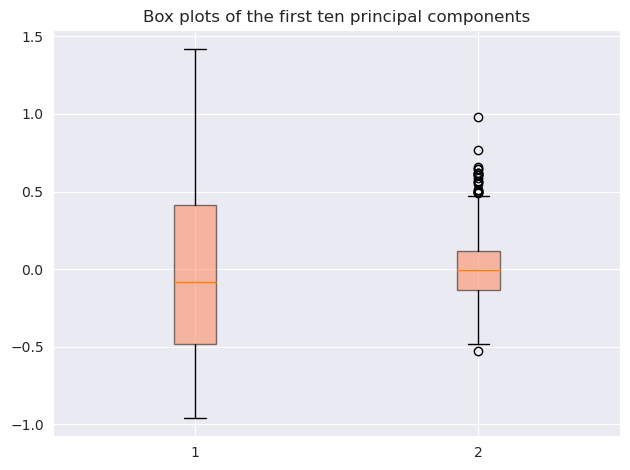

In [114]:
box = plt.boxplot(data_jours_pca[:,:10], patch_artist=True)
plt.setp(box["boxes"], facecolor="coral", alpha=.5)
plt.title("Box plots of the first ten principal components")
plt.tight_layout()
plt.show()

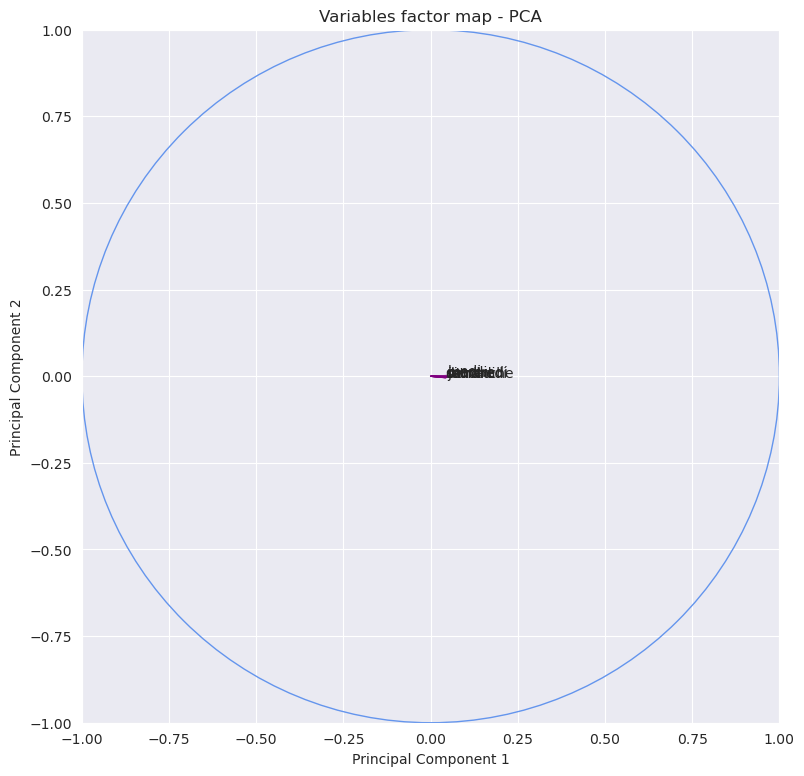

In [115]:
coord1 = pca.components_[0] * np.sqrt(pca_2.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca_2.explained_variance_[1])

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1, coord2, data_jours.columns):
    plt.text(i, j, nom, fontsize=10)
    plt.arrow(0, 0, i, j, color = 'purple', alpha=0.7, width = 0.0001)

plt.axis((-1, 1, -1, 1))
plt.gcf().gca().add_artist(plt.Circle((0, 0), radius = 1, color = 'cornflowerblue', fill = False))

plt.title('Variables factor map - PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.grid(True)
plt.show()

ACP nous dit donc que l'on peut ecpliquer les jours de la semaine avec deux variables au lieu de 7, pour expliquer + de 90% de la variance. Cependant comme pour l'ACP précédente les affichages sont pas jolis.

In [116]:
# ACP par heure de la journée

In [118]:
# Calcul des moyennes pour chaque heure de la journée
minuit_am = loading.iloc[:, [0, 24, 48, 72, 96, 120, 144]].mean(axis=1)
une_am = loading.iloc[:, [1, 25, 49, 73, 97, 121, 145]].mean(axis=1)
deux_am = loading.iloc[:, [2, 26, 50, 74, 98, 122, 146]].mean(axis=1)
trois_am = loading.iloc[:, [3, 27, 51, 75, 99, 123, 147]].mean(axis=1)
quatre_am = loading.iloc[:, [4, 28, 52, 76, 100, 124, 148]].mean(axis=1)
cinq_am = loading.iloc[:, [5, 29, 53, 77, 101, 125, 149]].mean(axis=1)
six_am = loading.iloc[:, [6, 30, 54, 78, 102, 126, 150]].mean(axis=1)
sept_am = loading.iloc[:, [7, 31, 55, 79, 103, 127, 151]].mean(axis=1)
huit_am = loading.iloc[:, [8, 32, 56, 80, 104, 128, 152]].mean(axis=1)
neuf_am = loading.iloc[:, [9, 33, 57, 81, 105, 129, 153]].mean(axis=1)
dix_am = loading.iloc[:, [10, 34, 58, 82, 106, 130, 154]].mean(axis=1)
onze_am = loading.iloc[:, [11, 35, 59, 83, 107, 131, 155]].mean(axis=1)
minuit_pm = loading.iloc[:, [12, 36, 60, 84, 108, 132, 156]].mean(axis=1)
une_pm = loading.iloc[:, [13, 37, 61, 85, 109, 133, 157]].mean(axis=1)
deux_pm = loading.iloc[:, [14, 38, 62, 86, 110, 134, 158]].mean(axis=1)
trois_pm = loading.iloc[:, [15, 39, 63, 87, 111, 135, 159]].mean(axis=1)
quatre_pm = loading.iloc[:, [16, 40, 64, 88, 112, 136, 160]].mean(axis=1)
cinq_pm = loading.iloc[:, [17, 41, 65, 89, 113, 137, 161]].mean(axis=1)
six_pm = loading.iloc[:, [18, 42, 66, 90, 114, 138, 162]].mean(axis=1)
sept_pm = loading.iloc[:, [19, 43, 67, 91, 115, 139, 163]].mean(axis=1)
huit_pm = loading.iloc[:, [20, 44, 68, 92, 116, 140, 164]].mean(axis=1)
neuf_pm = loading.iloc[:, [21, 45, 69, 93, 117, 141, 165]].mean(axis=1)
dix_pm = loading.iloc[:, [22, 46, 70, 94, 118, 142, 166]].mean(axis=1)
onze_pm = loading.iloc[:, [23, 47, 71, 95, 119, 143, 167]].mean(axis=1)

# Création du nouveau DataFrame
data_heures = pd.DataFrame({
    'Minuit': minuit_am,
    '1h': une_am,
    '2h': deux_am,
    '3h': trois_am,
    '4h': quatre_am,
    '5h': cinq_am,
    '6h': six_am,
    '7h': sept_am,
    '8h': huit_am,
    '9h': neuf_am,
    '10h': dix_am,
    '11h': onze_am,
    '12h': minuit_pm,
    '13h': une_pm,
    '14h': deux_pm,
    '15h': trois_pm,
    '16h': quatre_pm,
    '17h': cinq_pm,
    '18h': six_pm,
    '19h': sept_pm,
    '20h': huit_pm,
    '21h': neuf_pm,
    '22h': dix_pm,
    '23h': onze_pm
})

print(data_heures)

        Minuit        1h        2h        3h        4h        5h        6h  \
1     0.317475  0.331647  0.363975  0.383990  0.395139  0.400052  0.410634   
2     0.838509  0.826087  0.807453  0.819876  0.826087  0.826087  0.826087   
3     0.475774  0.413485  0.391440  0.388795  0.375663  0.354884  0.352287   
4     0.231293  0.238095  0.231293  0.251701  0.251701  0.251701  0.251701   
5     0.557892  0.508146  0.461705  0.419069  0.376858  0.347513  0.313966   
...        ...       ...       ...       ...       ...       ...       ...   
1185  0.149068  0.248447  0.291925  0.285714  0.298137  0.298419  0.310559   
1186  0.266667  0.301587  0.336508  0.352381  0.371429  0.387302  0.387302   
1187  0.337931  0.376355  0.434483  0.444171  0.458621  0.473235  0.459113   
1188  0.435918  0.439456  0.439456  0.489524  0.506667  0.493061  0.507755   
1189  0.369487  0.393371  0.384299  0.335192  0.321799  0.293594  0.306987   

            7h        8h        9h  ...       14h       15h    

In [119]:
pca_3 = PCA()
data_heures_pca = pca_3.fit_transform(data_heures)

on garde 2 composants pour le PCA


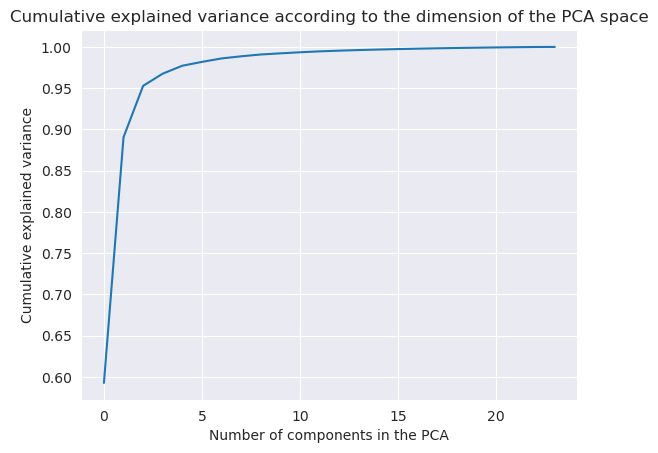

In [121]:
plt.plot(np.cumsum(pca_3.explained_variance_ratio_))

plt.title('Cumulative explained variance according to the dimension of the PCA space')
plt.xlabel('Number of components in the PCA')
plt.ylabel('Cumulative explained variance');


#permet de connaître le nombre de variables à garder pour expliquer 90% de la variance 

#pca = PCA(0.90).fit(loading) 

pca_3 = PCA(0.85).fit(data_heures) #pour savoir directement le nombre de composants nécessaire pour représenter une explication de 85% de la variance
pca_3.n_components_ #on affiche le nb de composants qu'on garde pour la PCA
print(f"on garde {pca_3.n_components_} composants pour le PCA")

In [122]:
pca_3 = PCA(n_components = 2)
data_heures_pca = pca_3.fit_transform(data_heures) #même chose que fit puis transform dans notre cas à nous

print(100*pca_3.explained_variance_ratio_)


print('--- PCA ---')
print('Initial dimension:', data_jours.shape)
print('Dimension after projection:', data_jours_pca.shape)

print('')

print('--- Explained variance ---')
print('Component 1:', round(pca_3.explained_variance_[0],2), 'i.e.', round(100*pca_3.explained_variance_ratio_[0],2), '% of the total variance')
print('Component 2:', round(pca_3.explained_variance_[1],2), 'i.e.', round(100*pca_3.explained_variance_ratio_[1],2), '% of the total variance')

[59.26296657 29.78474754]
--- PCA ---
Initial dimension: (1189, 7)
Dimension after projection: (1189, 2)

--- Explained variance ---
Component 1: 1.11 i.e. 59.26 % of the total variance
Component 2: 0.56 i.e. 29.78 % of the total variance


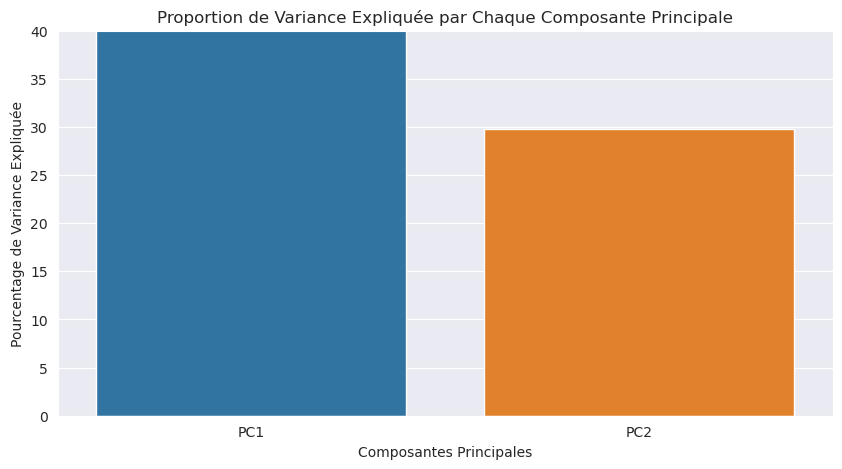

In [123]:
plt.figure(figsize=(10, 5))
sns.barplot(x=[f"PC{i+1}" for i in range(len(pca_3.explained_variance_ratio_))], y=pca_3.explained_variance_ratio_ * 100)
plt.xlabel("Composantes Principales")
plt.ylabel("Pourcentage de Variance Expliquée")
plt.title("Proportion de Variance Expliquée par Chaque Composante Principale")
plt.ylim(0, 40)  # limiter l'axe y à la plage spécifiée
plt.show()

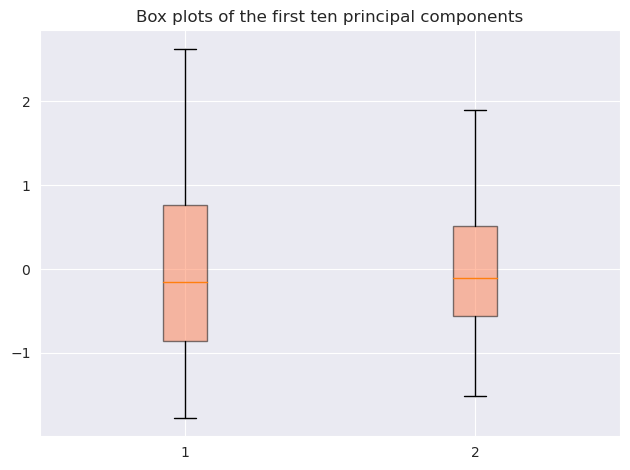

In [124]:
box = plt.boxplot(data_heures_pca[:,:10], patch_artist=True)
plt.setp(box["boxes"], facecolor="coral", alpha=.5)
plt.title("Box plots of the first ten principal components")
plt.tight_layout()
plt.show()

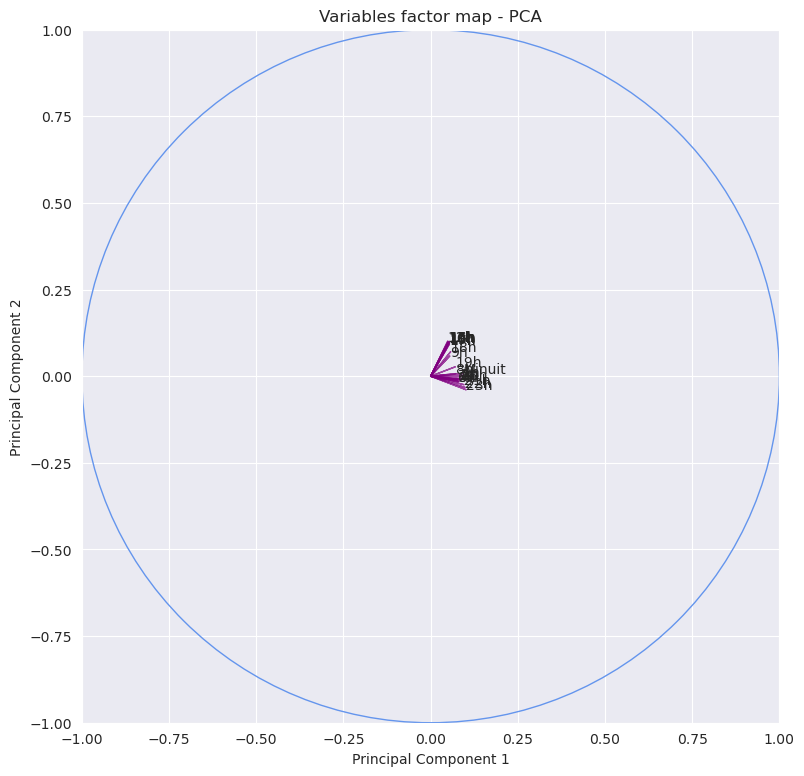

In [125]:
coord1 = pca.components_[0] * np.sqrt(pca_3.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca_3.explained_variance_[1])

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1, coord2, data_heures.columns):
    plt.text(i, j, nom, fontsize=10)
    plt.arrow(0, 0, i, j, color = 'purple', alpha=0.7, width = 0.0001)

plt.axis((-1, 1, -1, 1))
plt.gcf().gca().add_artist(plt.Circle((0, 0), radius = 1, color = 'cornflowerblue', fill = False))

plt.title('Variables factor map - PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.grid(True)
plt.show()